In [321]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

In [322]:
#df=pd.read_excel(r"C:\Users\user\Desktop\B409\ML current\Raw data excel.xlsx",'Sheet1')
#df.drop(["F_0.5","F_1.5"], axis=1,inplace=True)

df=pd.read_excel(r"C:\Users\user\Desktop\B409\ML current\Raw data excel.xlsx",'Cleaned Data')
# df.drop(["Gradient_F","Fmax_avg","Gradient_Fmax","F_avg","Fmax_change","F_change","Fmax_initial","F_initial"], axis=1,inplace=True)
df.drop(["F_0.5","F_1.5"], axis=1,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cyc_load       90 non-null     int64  
 1   d_max          90 non-null     int64  
 2   max_stretch    90 non-null     float64
 3   load_f         90 non-null     float64
 4   F_initial      90 non-null     float64
 5   F_change       90 non-null     float64
 6   F_mean         90 non-null     float64
 7   Gradient_F     90 non-null     float64
 8   Fmax_initial   90 non-null     float64
 9   Fmax_change    90 non-null     float64
 10  Fmax_mean      90 non-null     float64
 11  Gradient_Fmax  90 non-null     float64
 12  f_life         90 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 9.3 KB


,cyc_load,d_max,max_stretch,load_f,F_initial,F_change,F_mean,Gradient_F,Fmax_initial,Fmax_change,Fmax_mean,Gradient_Fmax,f_life
0,200,30,2.5,0.0556,0.505900,0.0526,0.5075,0.000122,0.8111,0.1128,0.8415,0.000262,431
1,200,30,2.5,0.0556,0.245235,0.0076,0.2425,0.000052,0.3658,-0.0769,0.3666,-0.000527,147
2,200,30,2.5,0.0556,0.135707,0.1391,0.1547,0.000293,0.2198,1.1572,0.3474,0.002436,476
3,200,30,2.5,0.0556,0.092113,0.1030,0.1216,0.000197,0.1426,1.3063,0.3883,0.002498,524
4,200,30,2.5,0.0556,0.118226,0.0065,0.1106,0.000016,0.1799,0.0218,0.1719,0.000053,414


In [323]:
#df.head(50)

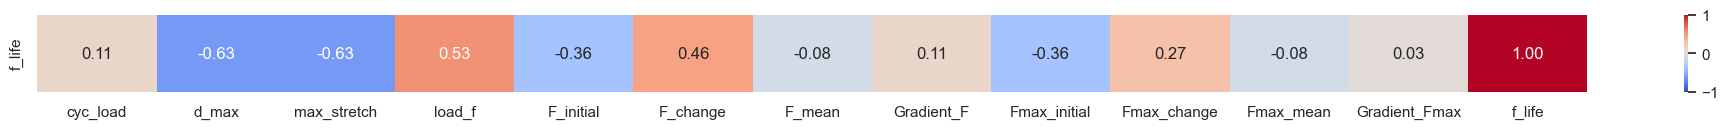

In [324]:
# Heatmap of the Correlation Matrix
# f = plt.figure(figsize=(25, 25))
# sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",cmap='coolwarm')

# Display the last row of the heatmap
f = plt.figure(figsize=(25, 1))
last_row_corr = df.corr().iloc[-1:, :]  # Select only the last row of the correlation matrix
heatmap = sb.heatmap(last_row_corr, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="coolwarm")

In [325]:
#X=df.loc[:,['cyc_load','d_max','F_0.5','F_1.5','max_stretch','load_f']] #displacement, cyclic load
#X=df.loc[:,['cyc_load','d_max','max_stretch','load_f','F_0.5','F_1.5']] #cyclic_load,max displacement, max_stretch, load_f, F_1.5

X=df.loc[:]
X.drop(["f_life","cyc_load","F_mean","Gradient_F","Fmax_mean","Gradient_Fmax"], axis=1,inplace=True)
y=df.loc[:,['f_life']] #no. of cycles 
# X.head(20)

# Create the final chosen variables dataframe
new_df = pd.concat([X.reset_index(drop=True), y], axis=1)
new_df.head()

,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change,f_life
0,30,2.5,0.0556,0.505900,0.0526,0.8111,0.1128,431
1,30,2.5,0.0556,0.245235,0.0076,0.3658,-0.0769,147
2,30,2.5,0.0556,0.135707,0.1391,0.2198,1.1572,476
3,30,2.5,0.0556,0.092113,0.1030,0.1426,1.3063,524
4,30,2.5,0.0556,0.118226,0.0065,0.1799,0.0218,414


### Linear regression for data augmentation

In [326]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [327]:
# Train the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [328]:
# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print("Model score:", score)

Model score: 0.7255003887702707


In [329]:
#print(model.predict([[200,30]]))

In [330]:
# Use the trained model to augment the data
#num_augmented_samples = 1000
num_augmented_samples = 500
augmented_data = []
for i in range(num_augmented_samples):
    # Randomly sample input variables
    X_sample = X.sample(n=1)
    
    # Use the model to predict the output variable
    y_sample = model.predict(X_sample)[0]
    
    # Append the augmented sample to the list
    augmented_sample = pd.concat([X_sample.reset_index(drop=True), pd.Series(y_sample)], axis=1)
    #augmented_sample.columns = df.columns
    
    # Set the column names of augmented_sample to match X and y
    augmented_sample.columns = X.columns.tolist() + y.columns.tolist()
    
    augmented_data.append(augmented_sample)


In [331]:
#change the augmented_data to a dataframe, augmented_df without the original data
augmented_df_without_ori = pd.concat(augmented_data, ignore_index=True)
augmented_df_without_ori.info()
augmented_df_without_ori.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   d_max         500 non-null    int64  
 1   max_stretch   500 non-null    float64
 2   load_f        500 non-null    float64
 3   F_initial     500 non-null    float64
 4   F_change      500 non-null    float64
 5   Fmax_initial  500 non-null    float64
 6   Fmax_change   500 non-null    float64
 7   f_life        500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change,f_life
0,30,2.50,0.0833,0.212534,0.0640,0.3469,0.1630,468.858724
1,20,2.00,0.1042,0.346125,0.1345,0.5669,0.2226,654.522956
2,25,2.25,0.0833,0.465084,0.0177,0.7788,0.0741,254.721137
3,25,2.25,0.1000,0.249111,0.2147,0.4643,0.4623,649.156087
4,30,2.50,0.0694,0.506878,0.1931,0.7941,0.6479,242.759353


In [332]:
# Assuming you have your DataFrame named 'df'
value_to_check = [25, 2.25, 0.0667, 0.216220, 0.0237, 0.3646, 0.0415]

# Check if the value is present in the DataFrame
is_present = X.isin(value_to_check).all(axis=1).any()

if is_present:
    print("The value is present in the DataFrame.")
else:
    print("The value is not present in the DataFrame.")

The value is present in the DataFrame.


In [333]:
# Concatenate the original data with the augmented data, augmented data with original data
#augmented_df = pd.concat([df] + augmented_data, ignore_index=True)
augmented_df = pd.concat([new_df] + augmented_data, ignore_index=True)

In [334]:
augmented_df.info()
augmented_df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   d_max         590 non-null    int64  
 1   max_stretch   590 non-null    float64
 2   load_f        590 non-null    float64
 3   F_initial     590 non-null    float64
 4   F_change      590 non-null    float64
 5   Fmax_initial  590 non-null    float64
 6   Fmax_change   590 non-null    float64
 7   f_life        590 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 37.0 KB


,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change,f_life
0,30,2.50,0.0556,0.505900,0.052600,0.8111,0.1128,431.0
1,30,2.50,0.0556,0.245235,0.007600,0.3658,-0.0769,147.0
2,30,2.50,0.0556,0.135707,0.139100,0.2198,1.1572,476.0
3,30,2.50,0.0556,0.092113,0.103000,0.1426,1.3063,524.0
4,30,2.50,0.0556,0.118226,0.006500,0.1799,0.0218,414.0
5,30,2.50,0.0556,0.172775,-0.024100,0.2395,-0.0309,235.0
6,30,2.50,0.0556,0.147371,-0.025300,0.2097,-0.0364,168.0
7,30,2.50,0.0556,0.220565,0.036700,0.3256,0.2967,382.0
8,30,2.50,0.0556,0.550500,0.187200,0.7933,0.4416,548.0
9,30,2.50,0.0556,0.378023,0.017400,0.5666,0.0292,287.0


### Statistical Analysis of the augmented data

<AxesSubplot: >

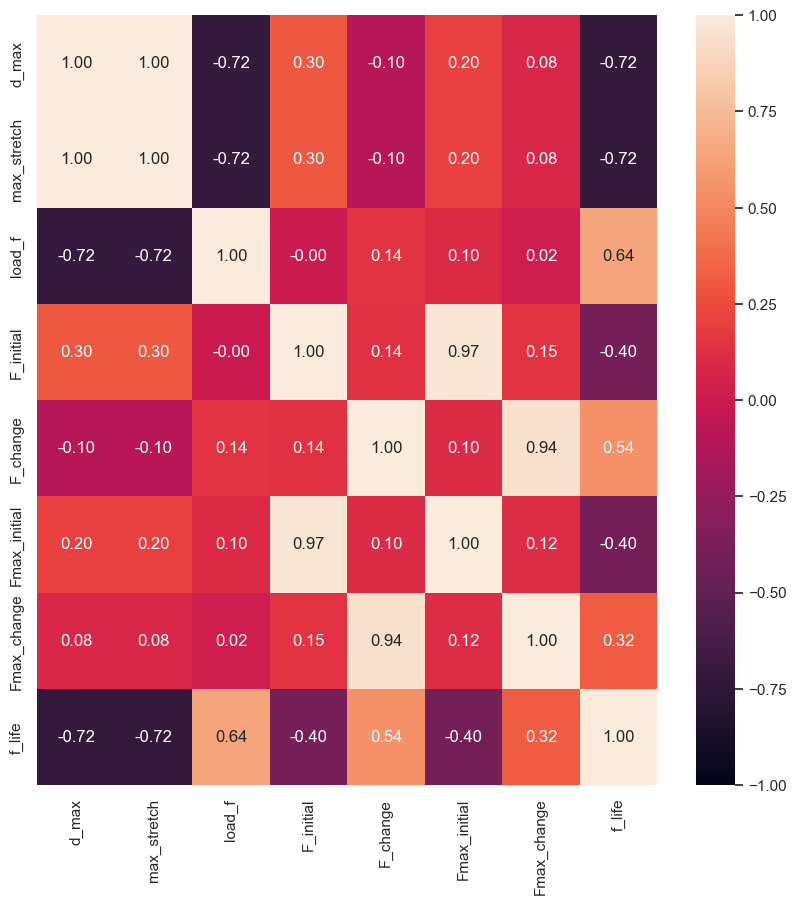

In [335]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sb.heatmap(augmented_df_without_ori.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [336]:
# Relationship between Response and the Predictors
#sb.pairplot(data = augmented_df)

In [337]:
augmented_df_without_ori.sort_values('f_life').tail(50)

,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change,f_life
12,20,2.0,0.1250,0.181845,0.1345,0.3587,0.2774,829.839529
451,20,2.0,0.1250,0.181845,0.1345,0.3587,0.2774,829.839529
417,20,2.0,0.1250,0.233522,0.1293,0.4037,0.2257,832.690646
254,20,2.0,0.1250,0.233522,0.1293,0.4037,0.2257,832.690646
394,20,2.0,0.0833,0.389663,0.6287,0.6908,1.3069,837.836009
493,20,2.0,0.0833,0.389663,0.6287,0.6908,1.3069,837.836009
467,20,2.0,0.0833,0.389663,0.6287,0.6908,1.3069,837.836009
392,20,2.0,0.1042,0.206235,0.2350,0.3531,0.3338,857.290056
324,20,2.0,0.1042,0.206235,0.2350,0.3531,0.3338,857.290056
64,20,2.0,0.1042,0.206235,0.2350,0.3531,0.3338,857.290056


### Ensure the augmented data is within the original data, no outliers in augmented data

In [338]:
# # Plot the original data
# plt.scatter(df["max_stretch"], df["f_life"], label="Original data",color="red")

# # Plot the augmented data without the original data
# plt.scatter(augmented_df_without_ori["max_stretch"],augmented_df_without_ori["f_life"], alpha=0.5, label="Augmented data",color="green")

# # Add axis labels and legend
# plt.xlabel("max_stretch")
# plt.ylabel("Fatigue life")
# plt.legend()

# # Show the plot
# plt.show()

In [339]:
# # Plot the original data
# plt.scatter(df["d_max"], df["f_life"], label="Original data",color="red")

# # Plot the augmented data
# plt.scatter(augmented_df_without_ori["d_max"], augmented_df_without_ori["f_life"], alpha=0.3, label="Augmented data",color="green")

# # Add axis labels and legend
# plt.xlabel("d_max")
# plt.ylabel("Fatigue life")
# plt.legend()

# # Show the plot
# plt.show()

In [340]:
# # Plot the original data
# plt.scatter(df["load_f"], df["f_life"], label="Original data",color="red")

# # Plot the augmented data
# plt.scatter(augmented_df_without_ori["load_f"], augmented_df_without_ori["f_life"], alpha=0.3, label="Augmented data",color="green")

# # Add axis labels and legend
# plt.xlabel("load_f")
# plt.ylabel("Fatigue life")
# plt.legend()

# # Show the plot
# plt.show()

In [341]:
# # Plot the original data
# plt.scatter(df["F_initial"], df["f_life"], label="Original data",color="red")

# # Plot the augmented data
# plt.scatter(augmented_df_without_ori["F_initial"], augmented_df_without_ori["f_life"], alpha=0.3, label="Augmented data",color="green")

# # Add axis labels and legend
# plt.xlabel("F_initial")
# plt.ylabel("Fatigue life")
# plt.legend()

# # Show the plot
# plt.show()

In [342]:
# # Plot the original data
# plt.scatter(df["F_change"], df["f_life"], label="Original data",color="red")

# # Plot the augmented data
# plt.scatter(augmented_df_without_ori["F_change"], augmented_df_without_ori["f_life"], alpha=0.3, label="Augmented data",color="green")

# # Add axis labels and legend
# plt.xlabel("F_change")
# plt.ylabel("Fatigue life")
# plt.legend()

# # Show the plot
# plt.show()

In [343]:
# # Plot the original data
# plt.scatter(df["Fmax_initial"], df["f_life"], label="Original data",color="red")

# # Plot the augmented data
# plt.scatter(augmented_df_without_ori["Fmax_initial"], augmented_df_without_ori["f_life"], alpha=0.3, label="Augmented data",color="green")

# # Add axis labels and legend
# plt.xlabel("Fmax_initial")
# plt.ylabel("Fatigue life")
# plt.legend()

# # Show the plot
# plt.show()

In [344]:
# # Plot the original data
# plt.scatter(df["Fmax_change"], df["f_life"], label="Original data",color="red")

# # Plot the augmented data
# plt.scatter(augmented_df_without_ori["Fmax_change"], augmented_df_without_ori["f_life"], alpha=0.3, label="Augmented data",color="green")

# # Add axis labels and legend
# plt.xlabel("Fmax_change")
# plt.ylabel("Fatigue life")
# plt.legend()

# # Show the plot
# plt.show()

//### Ensure the f_life mean of augmented data is close to original data
## <font color="purple"> Ensure the augmented data is closely indentical to the original data/ no outliers in augmented data </font>

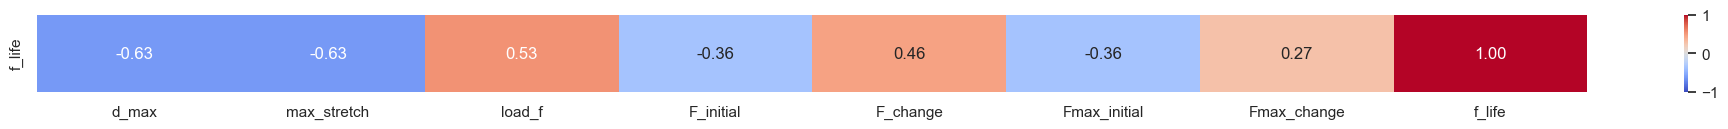

In [345]:
# Heatmap of the Correlation Matrix
# Display the last row of the heatmap
f = plt.figure(figsize=(25, 1))
last_row_corr = new_df.corr().iloc[-1:, :]  # Select only the last row of the correlation matrix
heatmap = sb.heatmap(last_row_corr, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="coolwarm")

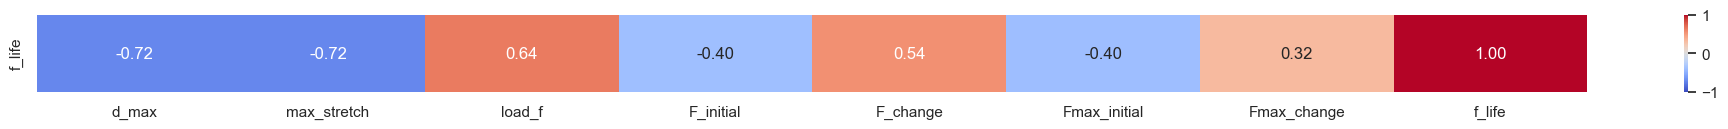

In [346]:
# Heatmap of the Correlation Matrix
# Display the last row of the heatmap
f = plt.figure(figsize=(25, 1))
last_row_corr = augmented_df_without_ori.corr().iloc[-1:, :]  # Select only the last row of the correlation matrix
heatmap = sb.heatmap(last_row_corr, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="coolwarm")

In [347]:
# Check the statistical summary of original data
#df.describe()
new_df.describe()

,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change,f_life
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,25.000000,2.250000,0.085644,0.301861,0.147857,0.520289,0.411040,498.555556
std,4.105354,0.205268,0.020227,0.136558,0.262570,0.221864,1.021304,309.335719
min,20.000000,2.000000,0.055600,0.082712,-0.053900,0.142600,-0.084100,87.000000
25%,20.000000,2.000000,0.069400,0.184718,0.023725,0.327775,0.071400,219.500000
50%,25.000000,2.250000,0.083300,0.276461,0.076550,0.503850,0.154600,442.000000
75%,30.000000,2.500000,0.100000,0.418994,0.147100,0.732573,0.319875,701.750000
max,30.000000,2.500000,0.125000,0.639317,1.939900,0.983900,8.723200,1309.000000


In [348]:
# Check the statistical summary of augmented data + original data
augmented_df_without_ori.describe()

,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change,f_life
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,25.070000,2.253500,0.085303,0.300346,0.151059,0.517254,0.41547,487.608471
std,4.071641,0.203582,0.020113,0.132497,0.269982,0.216972,1.05260,258.046170
min,20.000000,2.000000,0.055600,0.082712,-0.053900,0.142600,-0.08410,63.923775
25%,20.000000,2.000000,0.069400,0.193338,0.022500,0.323350,0.06615,289.045309
50%,25.000000,2.250000,0.083300,0.273200,0.087500,0.497300,0.16300,391.980674
75%,30.000000,2.500000,0.100000,0.424484,0.187200,0.733630,0.32550,665.315985
max,30.000000,2.500000,0.125000,0.639317,1.939900,0.983900,8.72320,1340.103710


In [349]:
# Calculate the absolute difference between statistical values of new_df and augmented_df
abs_diff = abs(new_df.describe() - augmented_df_without_ori.describe())
abs_diff

,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change,f_life
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,0.070000,0.003500,0.000342,0.001515,0.003202,0.003036,0.004430,10.947085
std,0.033714,0.001686,0.000113,0.004062,0.007411,0.004892,0.031296,51.289548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.076225
25%,0.000000,0.000000,0.000000,0.008620,0.001225,0.004425,0.005250,69.545309
50%,0.000000,0.000000,0.000000,0.003261,0.010950,0.006550,0.008400,50.019326
75%,0.000000,0.000000,0.000000,0.005489,0.040100,0.001057,0.005625,36.434015
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.103710


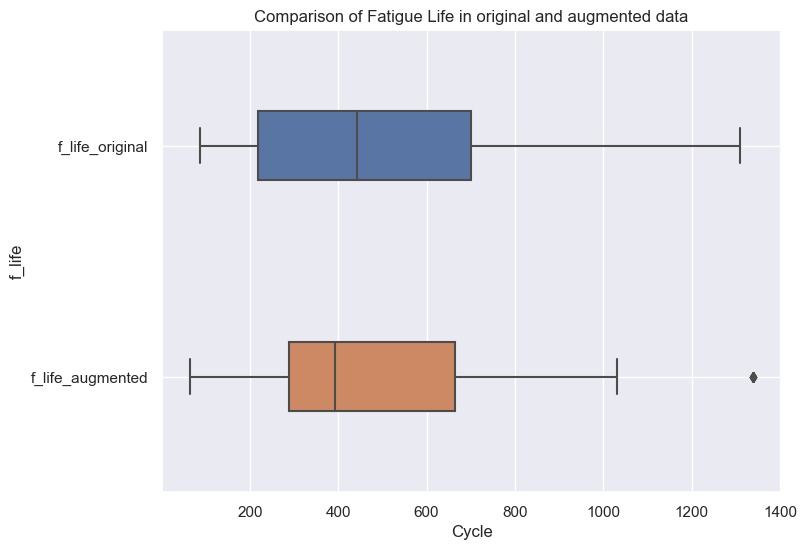

In [350]:
# Create a new DataFrame that combines the two datasets
combined_data = pd.concat([new_df['f_life'], augmented_df_without_ori['f_life']], axis=1)
combined_data.columns = ['f_life_original', 'f_life_augmented']

# Plot the side-by-side boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(data=combined_data, orient='h',width=0.3)
plt.xlabel('Cycle')
plt.ylabel('f_life')
plt.title('Comparison of Fatigue Life in original and augmented data')
plt.grid(axis='y')
plt.show()

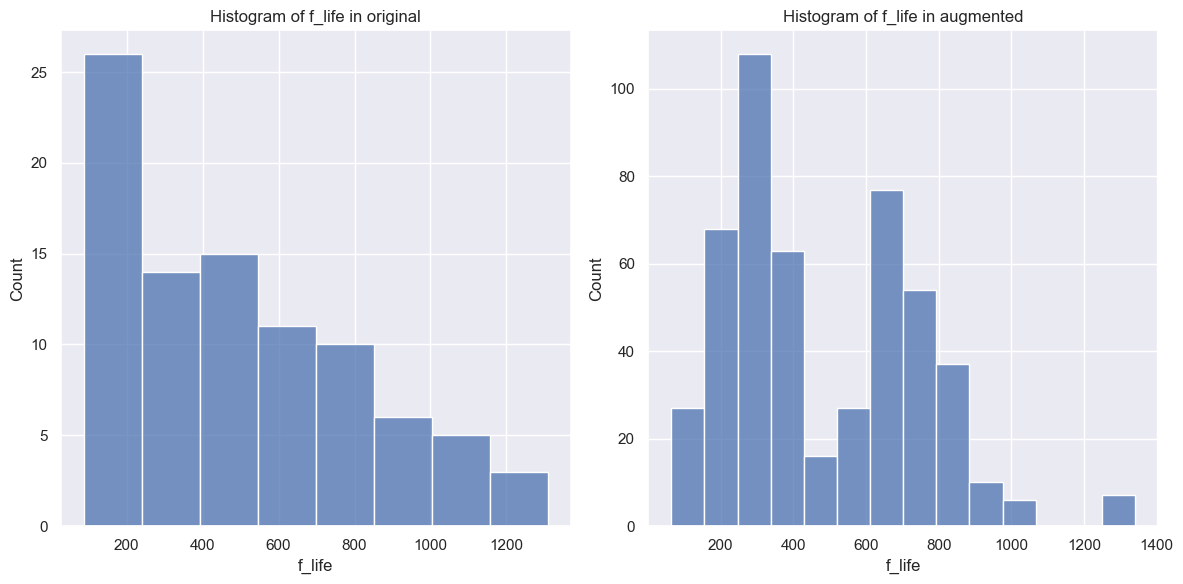

In [351]:
# Set up matplotlib figure with one subplot divided into two parts
f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram for Variable1 in dataset1
sb.histplot(data=new_df, x='f_life', ax=axes[0])
axes[0].set_title('Histogram of f_life in original')

# Plot the second histogram for Variable2 in dataset1
sb.histplot(data=augmented_df_without_ori, x='f_life', ax=axes[1])
axes[1].set_title('Histogram of f_life in augmented')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

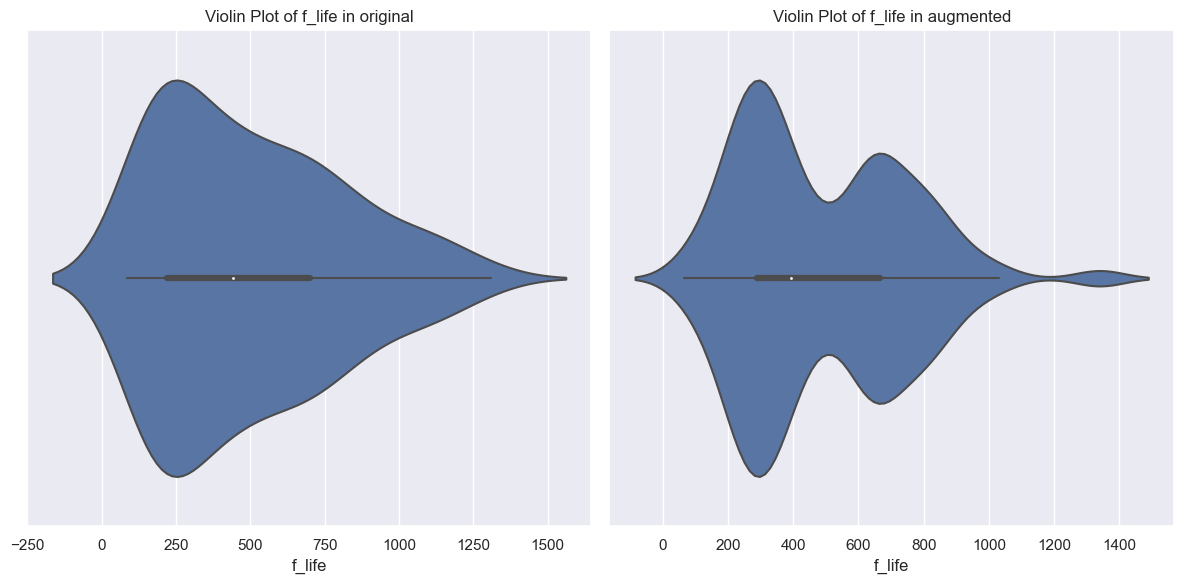

In [352]:
# Set up matplotlib figure with one subplot divided into two parts
f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first violin plot for dataset1
sb.violinplot(data=new_df, x='f_life', ax=axes[0])
axes[0].set_title('Violin Plot of f_life in original')

# Plot the second violin plot for dataset2
sb.violinplot(data=augmented_df_without_ori, x='f_life', ax=axes[1])
axes[1].set_title('Violin Plot of f_life in augmented')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## Ensure Augmented + Original Data is closely identical to the Original Data

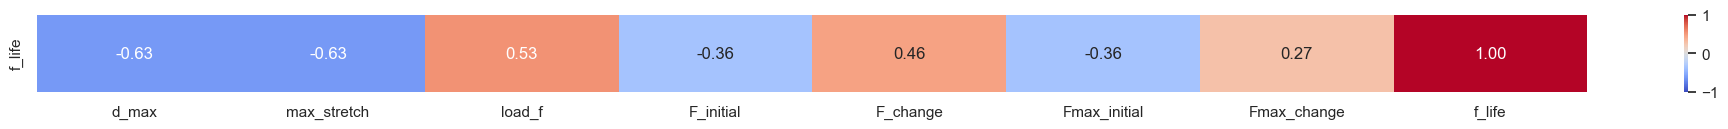

In [353]:
# Heatmap of the Correlation Matrix
# Display the last row of the heatmap
f = plt.figure(figsize=(25, 1))
last_row_corr = new_df.corr().iloc[-1:, :]  # Select only the last row of the correlation matrix
heatmap = sb.heatmap(last_row_corr, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="coolwarm")

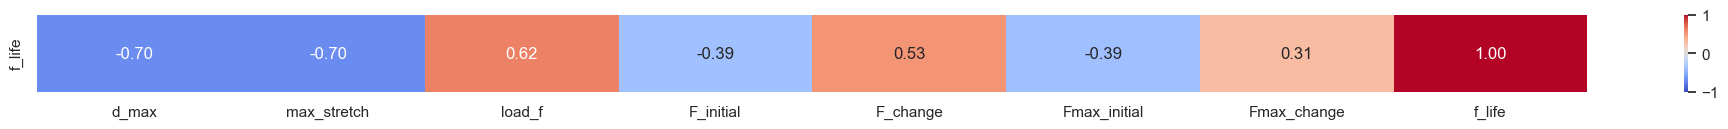

In [354]:
# Heatmap of the Correlation Matrix
# Display the last row of the heatmap
f = plt.figure(figsize=(25, 1))
last_row_corr = augmented_df.corr().iloc[-1:, :]  # Select only the last row of the correlation matrix
heatmap = sb.heatmap(last_row_corr, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="coolwarm")

In [355]:
# Calculate the absolute difference between statistical values of new_df and augmented_df
abs_diff = abs(new_df.describe() - augmented_df.describe())
abs_diff

,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change,f_life
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.059322,0.002966,0.000290,0.001284,0.002713,0.002573,0.003754,9.277191
std,0.031977,0.001599,0.000113,0.003551,0.006077,0.004326,0.025730,43.088614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.076225
25%,0.000000,0.000000,0.000000,0.008620,0.001225,0.002175,0.003000,54.140881
50%,0.000000,0.000000,0.000000,0.003261,0.007700,0.006550,0.008400,45.500000
75%,0.000000,0.000000,0.000000,0.005489,0.027600,0.001057,0.005625,34.739441
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.103710


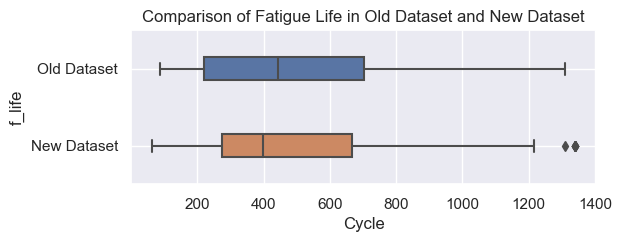

In [389]:
# Create a new DataFrame that combines the two datasets
combined_data = pd.concat([new_df['f_life'], augmented_df['f_life']], axis=1)
combined_data.columns = ['Old Dataset', 'New Dataset']

# Plot the side-by-side boxplot
plt.figure(figsize=(6, 2))
sb.boxplot(data=combined_data, orient='h',width=0.3)
plt.xlabel('Cycle')
plt.ylabel('f_life')
plt.title('Comparison of Fatigue Life in Old Dataset and New Dataset')
plt.grid(axis='y')
plt.show()

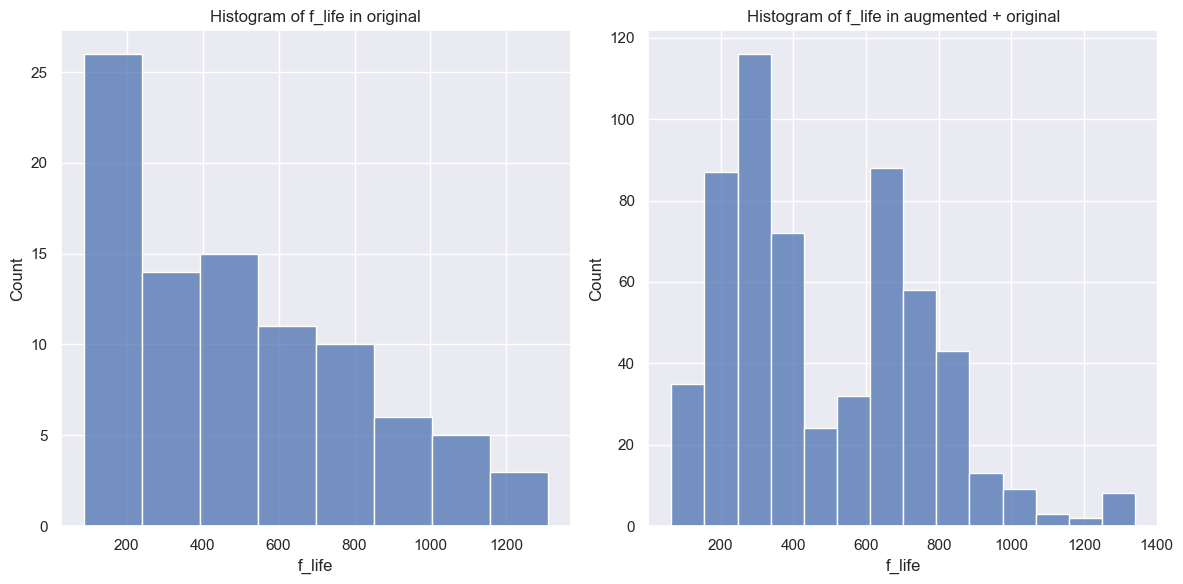

In [357]:
# Set up matplotlib figure with one subplot divided into two parts
f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram for Variable1 in dataset1
sb.histplot(data=new_df, x='f_life', ax=axes[0])
axes[0].set_title('Histogram of f_life in original')

# Plot the second histogram for Variable2 in dataset1
sb.histplot(data=augmented_df, x='f_life', ax=axes[1])
axes[1].set_title('Histogram of f_life in augmented + original')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

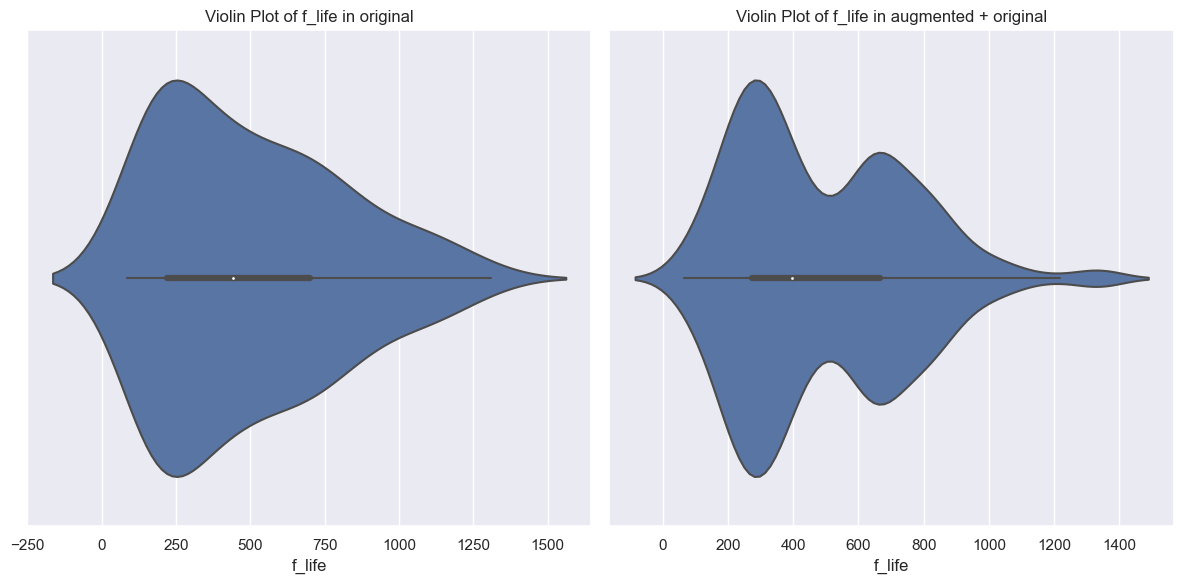

In [358]:
# Set up matplotlib figure with one subplot divided into two parts
f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first violin plot for dataset1
sb.violinplot(data=new_df, x='f_life', ax=axes[0])
axes[0].set_title('Violin Plot of f_life in original')

# Plot the second violin plot for dataset2
sb.violinplot(data=augmented_df, x='f_life', ax=axes[1])
axes[1].set_title('Violin Plot of f_life in augmented + original')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### ML using the  Original Data

In [359]:
#X_aug=augmented_df.loc[:,['cyc_load','d_max','F_0.5','F_1.5']] #displacement, cyclic load
#X_aug=augmented_df.loc[:,['cyc_load','d_max']] #displacement, cyclic load
#X_aug=augmented_df.loc[:,['cyc_load','d_max','max_stretch','load_f','F_1.5']] #displacement, cyclic load
X_ori=new_df.loc[:] 
X_ori.drop(['f_life'], axis=1,inplace=True)
y_ori=new_df.loc[:,['f_life']] #no. of cycles 
X_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   d_max         90 non-null     int64  
 1   max_stretch   90 non-null     float64
 2   load_f        90 non-null     float64
 3   F_initial     90 non-null     float64
 4   F_change      90 non-null     float64
 5   Fmax_initial  90 non-null     float64
 6   Fmax_change   90 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.0 KB


In [379]:
## DATE SEPERATION
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X_ori, y_ori, test_size=0.20,random_state=3)

In [380]:
## SVM
regr=svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
regr.fit(X_train_ori, y_train_ori.values.ravel())
p_svm=regr.predict(X_test_ori)
s1=regr.score(X_test_ori, y_test_ori)
s1a=regr.score(X_train_ori, y_train_ori)
print(s1,s1a)

0.5442094061589187 0.48626842066870746


In [381]:
## TREE
#clf = tree.DecisionTreeRegressor(max_depth=1000)
# clf = tree.DecisionTreeRegressor(max_depth=10)
clf = tree.DecisionTreeRegressor(max_depth=5)
clf = clf.fit(X_train_ori, y_train_ori)
p_tree=clf.predict(X_test_ori) 
s2=clf.score(X_test_ori, y_test_ori)
s2a=clf.score(X_train_ori, y_train_ori)
print(s2,s2a)

0.605799864262671 0.9450242291640513


In [382]:
## Linear
reg = linear_model.Ridge(alpha=.5)
regr_linear=reg.fit(X_train_ori, y_train_ori)
p_linear=reg.predict(X_test_ori) 
s4=regr_linear.score(X_test_ori, y_test_ori)
s4a=regr_linear.score(X_train_ori, y_train_ori)
print(s4,s4a)

0.6290464029040822 0.6282728653094677


In [383]:
## Neighbors
# knn = neighbors.KNeighborsRegressor(n_neighbors=1,weights='distance')
knn = neighbors.KNeighborsRegressor(n_neighbors=5,weights='uniform')
p_KNN= knn.fit(X_train_ori, y_train_ori).predict(X_test_ori)
s5=knn.score(X_test_ori, y_test_ori)
s5a=knn.score(X_train_ori, y_train_ori)
print(s5,s5a)

0.6784405818184617 0.7486208415748341


In [384]:
## ANN
regr_ANN=MLPRegressor(random_state=1, max_iter=5000).fit(X_train_ori,y_train_ori.values.ravel())
p_ANN=regr_ANN.predict(X_test_ori)
s3=regr_ANN.score(X_test_ori, y_test_ori)
s3a=regr_ANN.score(X_train_ori, y_train_ori)
print(s3,s3a)

0.6120556886359618 0.6318855228130149


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


### ML using the Augmented Data + Original Data

In [366]:
#X_aug=augmented_df.loc[:,['cyc_load','d_max','F_0.5','F_1.5']] #displacement, cyclic load
#X_aug=augmented_df.loc[:,['cyc_load','d_max']] #displacement, cyclic load
#X_aug=augmented_df.loc[:,['cyc_load','d_max','max_stretch','load_f','F_1.5']] #displacement, cyclic load
X_aug=augmented_df.loc[:] 
X_aug.drop(['f_life'], axis=1,inplace=True)
y_aug=augmented_df.loc[:,['f_life']] #no. of cycles 
X_aug.head()

,d_max,max_stretch,load_f,F_initial,F_change,Fmax_initial,Fmax_change
0,30,2.5,0.0556,0.505900,0.0526,0.8111,0.1128
1,30,2.5,0.0556,0.245235,0.0076,0.3658,-0.0769
2,30,2.5,0.0556,0.135707,0.1391,0.2198,1.1572
3,30,2.5,0.0556,0.092113,0.1030,0.1426,1.3063
4,30,2.5,0.0556,0.118226,0.0065,0.1799,0.0218


In [367]:
## DATE SEPERATION
#X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, y_aug,random_state=1)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, y_aug, test_size=0.20,random_state=1)

In [368]:
## SVM
regr=svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
regr.fit(X_train_aug, y_train_aug.values.ravel())
p_svm=regr.predict(X_test_aug)
s1=regr.score(X_test_aug, y_test_aug)
s1a=regr.score(X_train_aug, y_train_aug)
print(s1,s1a)

0.8006122210911545 0.8304925265911383


In [369]:
## TREE
#clf = tree.DecisionTreeRegressor(max_depth=1000)
clf = tree.DecisionTreeRegressor(max_depth=10)
clf = clf.fit(X_train_aug, y_train_aug)
p_tree=clf.predict(X_test_aug) 
s2=clf.score(X_test_aug, y_test_aug)
s2a=clf.score(X_train_aug, y_train_aug)
print(s2,s2a)

0.8825191246051128 0.9550822087754246


In [370]:
## Linear
reg = linear_model.Ridge(alpha=.5)
regr_linear=reg.fit(X_train_aug, y_train_aug)
p_linear=reg.predict(X_test_aug) 
s4=regr_linear.score(X_test_aug, y_test_aug)
s4a=regr_linear.score(X_train_aug, y_train_aug)
print(s4,s4a)

0.8605994724772075 0.8853597396757659


In [371]:
## Neighbors
# knn = neighbors.KNeighborsRegressor(n_neighbors=1,weights='distance')
knn = neighbors.KNeighborsRegressor(n_neighbors=5,weights='uniform')
p_KNN= knn.fit(X_train_aug, y_train_aug).predict(X_test_aug)
s5=knn.score(X_test_aug, y_test_aug)
s5a=knn.score(X_train_aug, y_train_aug)
print(s5,s5a)

0.9030555672617334 0.9453374987674489


In [372]:
## ANN
regr_ANN=MLPRegressor(random_state=1, max_iter=5000).fit(X_train_aug,y_train_aug.values.ravel())
p_ANN=regr_ANN.predict(X_test_aug)
s3=regr_ANN.score(X_test_aug, y_test_aug)
s3a=regr_ANN.score(X_train_aug, y_train_aug)
print(s3,s3a)

0.8914266336542979 0.914101926926754


### using the augmented data + original data , fit different ML models
### undergo the experiment with new parameters to get a value of fatigue life from experiment
### input the ML models with the same new parameters to get a value of fatigue life from ML model
### compare the ML output fatigue life & experiment fatigue life to see if data augmentation method is viable